In [26]:
#%%
import os

from utils_park import *
from vocab import *
from collections import Counter
import numpy as np
import pandas as pd	
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
rq1 = '../data_RQ1/'
train_code_path = os.path.join(rq1,'train/train.token.code')
valid_code_path = os.path.join(rq1,'valid/valid.token.code')
test_code_path = os.path.join(rq1,'test/test.token.code')

train_nl_path = os.path.join(rq1,'train/train.token.nl')
valid_nl_path = os.path.join(rq1,'valid/valid.token.nl')
test_nl_path = os.path.join(rq1,'test/test.token.nl')

In [17]:
# 데이터 토큰개수 리스트
def count_token(f_name):
    tokens = read_file(f_name)
    len_list = [len(x.split()) for x in tokens]
    return len_list

# 통계분석
def cal(len_list):
    mean = np.mean(len_list) # 평균
    var = np.var(len_list) # 분산
    std = np.std(len_list) # 표준편차
    max_ = max(len_list) # 최댓값
    min_ = min(len_list) # 최솟값
    mid = np.median(len_list) # 중앙값

    c = Counter(len_list) 
    temp_mode = c.most_common(1) # 최빈값
    mode = temp_mode[0][0]

    print(f'mean: {mean:.5f}')
    print(f'variance: {var:.5f}')
    print(f'std: {std:.5f}')
    print(f'mode: {mode:.5f}')
    print(f'mid: {mid:.5f}')
    print(f'max: {max_:.5f}')
    print(f'min: {min_:.5f}')

In [33]:
train_code_tkn = count_token(train_code_path)
cal(train_code_tkn)

mean: 53.78873
variance: 1944.64866
std: 44.09817
mode: 10.00000
mid: 38.00000
max: 199.00000
min: 5.00000


In [19]:
test_code_tkn = count_token(test_code_path)
cal(test_code_tkn)

mean: 53.51125
variance: 1916.66947
std: 43.77978
mode: 10.00000
mid: 38.00000
max: 199.00000
min: 5.00000


In [20]:
valid_code_tkn = count_token(valid_code_path)
cal(valid_code_tkn)

mean: 53.75495
variance: 1960.60240
std: 44.27869
mode: 10.00000
mid: 37.00000
max: 199.00000
min: 5.00000


In [21]:
all_code_tkn = train_code_tkn + test_code_tkn + valid_code_tkn
cal(all_code_tkn)

mean: 53.77591
variance: 1944.15665
std: 44.09259
mode: 10.00000
mid: 38.00000
max: 199.00000
min: 5.00000


In [41]:
train_nl_tkn = count_token(train_nl_path)
cal(train_nl_tkn)

mean: 10.36220
variance: 22.54483
std: 4.74814
mode: 8.00000
mid: 9.00000
max: 34.00000
min: 0.00000


In [42]:
test_nl_tkn = count_token(test_nl_path)
cal(test_nl_tkn)

mean: 10.30995
variance: 22.22068
std: 4.71388
mode: 8.00000
mid: 9.00000
max: 31.00000
min: 0.00000


In [43]:
valid_nl_tkn = count_token(valid_nl_path)
cal(valid_nl_tkn)

mean: 10.34345
variance: 22.25589
std: 4.71762
mode: 8.00000
mid: 9.00000
max: 30.00000
min: 0.00000


In [44]:
all_nl_tkn = train_nl_tkn + test_nl_tkn + valid_nl_tkn
cal(all_nl_tkn)

mean: 10.35927
variance: 22.51971
std: 4.74549
mode: 8.00000
mid: 9.00000
max: 34.00000
min: 0.00000


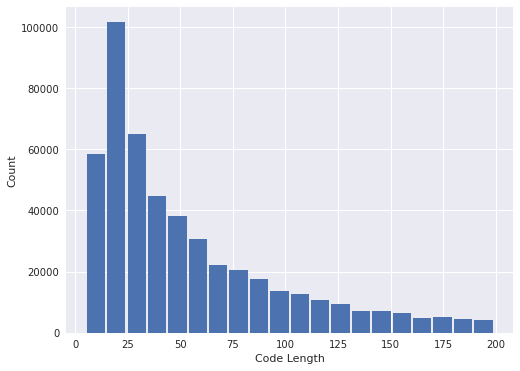

In [39]:
plt.style.use(['seaborn'])
plt.figure(figsize=((8,6)))
plt.xlabel('Code Length(Tokens)')
plt.ylabel('Count')
plt.hist(all_code_tkn, bins=20, rwidth = 0.9)
plt.show()

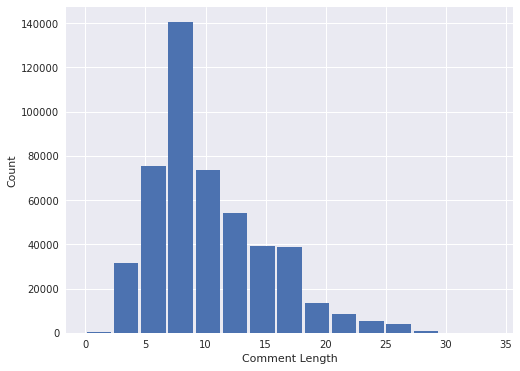

In [47]:
plt.style.use(['seaborn'])
plt.figure(figsize=((8,6)))
plt.xlabel('Comment Length(Tokens)')
plt.ylabel('Count')
plt.hist(all_nl_tkn, bins=15, rwidth = 0.9)
plt.show()

In [3]:
rq1 = '../data_RQ1/'
VOCAB_SIZE = 40000 # 40000
out_path = os.path.join(rq1, '40000_vocab_park/')

PAD = '<pad>'
UNK = '<unk>'
SOS = '<start>'
EOS = '<end>'

PAD_ID = 0
UNK_ID = 1
SOS_ID = 2
EOS_ID = 3

train_code_path = os.path.join(rq1, 'train/train.token.code')
train_nl_path = os.path.join(rq1,'train/train.token.nl')
#train_sbt_path = os.path.join(rq1,'train/train.token.sbt')
train_isbtcode_path = os.path.join(rq1,'train/train.token.isbtcode')
train_simsbt_path = os.path.join(rq1,'train/train.token.simsbt')
train_simsbtcode_path = os.path.join(rq1,'train/train.token.simsbtcode')

valid_code_path = os.path.join(rq1, 'valid/valid.token.code')
valid_nl_path = os.path.join(rq1, 'valid/valid.token.nl')
#valid_sbt_path = os.path.join(rq1,'valid/valid.token.sbt')
valid_isbtcode_path = os.path.join(rq1,'valid/valid.token.isbtcode')
valid_simsbt_path = os.path.join(rq1,'valid/valid.token.simsbt')
valid_simsbtcode_path = os.path.join(rq1,'valid/valid.token.simsbtcode')

test_code_path = os.path.join(rq1, 'test/test.token.code')
test_nl_path =  os.path.join(rq1, 'test/test.token.nl')
#test_sbt_path = os.path.join(rq1,'test/test.token.sbt')
test_isbtcode_path = os.path.join(rq1,'test/test.token.isbtcode')
test_simsbt_path = os.path.join(rq1,'test/test.token.simsbt')
test_simsbtcode_path = os.path.join(rq1,'test/test.token.simsbtcode')


# Code Vocab 만들기

In [9]:
f_name = train_code_path
code_lines = read_file(f_name)

print(len(code_lines)) # 문장개수

445812


In [7]:
code_tokens = split_code(code_lines)
code_vocab = make_vocab(code_tokens, "code", VOCAB_SIZE)
code_vocab[:10] # vocab 상위 10개 확인

['<pad>', '<unk>', '(', ')', ';', '.', ',', '{', '}', '=']

### code vocab 저장

In [8]:
out_name = 'vocab.code'
out_vocab = code_vocab
save_vocab(out_path, out_name, out_vocab)

# nl vocab 만들기

In [ ]:
f_name = train_nl_path
nl_lines = read_file(f_name)

print(len(nl_lines)) # 문장개수

In [ ]:
nl_vocab = make_vocab(nl_lines, "nl", VOCAB_SIZE)

### nl vocab 저장

In [ ]:
out_name = 'vocab.nl'
out_vocab = nl_vocab
save_vocab(out_path, out_name, out_vocab)       

# isbtcode Vocab 만들기

In [10]:
f_name = train_isbtcode_path
isbtcode_lines = read_file(f_name)

print(len(isbtcode_lines)) # 문장개수

# for line in isbtcode_lines[:3]:
#     print(line)

445812


In [11]:
isbtcode_vocab = make_vocab(isbtcode_lines, "isbtcode", VOCAB_SIZE)

### isbtcode vocab 저장

In [12]:
out_name = 'vocab.isbtcode'
out_vocab = isbtcode_vocab
save_vocab(out_path, out_name, out_vocab)       

# SIM SBT Vocab 만들기

In [ ]:
f_name = train_simsbt_path
simsbt_lines = read_file(f_name)

print(len(simsbt_lines)) # 문장개수

for line in simsbt_lines[:5]:
    print(line)

In [ ]:
simsbt_vocab = make_vocab(simsbt_lines, "simsbt", VOCAB_SIZE)

### sim sbt vocab 저장

In [ ]:
out_name = 'vocab.simsbt'
out_vocab = simsbt_vocab
save_vocab(out_path, out_name, out_vocab)       

# SIM SBT+code Vocab 만들기

In [ ]:
f_name = train_simsbtcode_path 
simsbtcode_lines = read_file(f_name)

print(len(simsbtcode_lines)) # 문장개수

for line in simsbtcode_lines[:5]:
    print(line)

In [ ]:
simsbtcode_vocab = make_vocab(simsbtcode_lines, "simsbtcode", VOCAB_SIZE)

### sim sbt+code  vocab 저장

In [ ]:
out_name = 'vocab.simsbtcode'
out_vocab = simsbtcode_vocab
save_vocab(out_path, out_name, out_vocab)       

# IDS

In [10]:
train_code = read_file(train_code_path)

train_ids_list = []
for i in train_code:
    try:
        train_ids_list.append(get_ids(i))
    except:
        pass

In [12]:
test_code = read_file(test_code_path)

test_ids_list = []
for i in test_code:
    try:
        test_ids_list.append(get_ids(i))
    except:
        pass

In [ ]:
valid_code = read_file(valid_code_path)

valid_ids_list = []
for i in valid_code:
    try:
        valid_ids_list.append(get_ids(i))
    except:
        pass

In [ ]:
len(train_ids_list), len(test_ids_list), len(valid_ids_list)

In [11]:
train_out_path = rq1 +'40000_idxdata_park/train/'
test_out_path = rq1 + '40000_idxdata_park/test/'
valid_out_path = rq1 +'40000_idxdata_park/valid/'

In [ ]:
save_file(train_out_path, 'ids', train_ids_list)
save_file(test_out_path, 'ids', test_ids_list)
save_file(valid_out_path, 'ids', valid_ids_list)

# SIM_IDS

In [ ]:
train_code = read_file(train_code_path)

train_simids_list = []
for i in train_code:
    try:
        train_simids_list.append(get_simids(i))
    except:
        pass

In [ ]:
test_code = read_file(test_code_path)

test_simids_list = []
for i in test_code:
    try:
        test_simids_list.append(get_simids(i))
    except:
        pass

In [ ]:
valid_code = read_file(valid_code_path)

valid_simids_list = []
for i in valid_code:
    try:
        valid_simids_list.append(get_simids(i))
    except:
        pass

In [ ]:
len(train_simids_list), len(test_simids_list), len(valid_simids_list)

# Vocab 불러와서 문장 indexing

In [22]:
vocab_path = '../data_RQ1/40000_vocab_park/'
code_vocab_path = vocab_path + 'vocab.code'
nl_vocab_path = vocab_path + 'vocab.nl'
isbtcode_vocab_path = vocab_path + 'vocab.isbtcode'
simsbt_vocab_path = vocab_path + 'vocab.simsbt'
simsbtcode_vocab_path = vocab_path + 'vocab.simsbtcode' 

# out path
train_out_path = '../data_RQ1/40000_idxdata_park/train/'
test_out_path = '../data_RQ1/40000_idxdata_park/test/'
valid_out_path = '../data_RQ1/40000_idxdata_park/valid/'

In [ ]:
# sbt_dic, rev_sbt_dic = initialize_vocabulary(se_sbt_vocab_path) # file to dictionary

# test_sbt = idx_to_sentence('./test/sbt', rev_sbt_dic, "sbt")

### vocab 파일 불러와서 딕셔너리 생성

### indexing code

In [ ]:
code_dic, rev_code_dic = initialize_vocabulary(code_vocab_path) # file to dictionary

train_code = sentence_to_idx(train_code_path, code_dic, "code")
test_code = sentence_to_idx(test_code_path, code_dic, "code")
valid_code = sentence_to_idx(valid_code_path, code_dic, "code")

In [ ]:
save_idx_file(train_out_path, 'code', train_code)
save_idx_file(test_out_path, 'code', test_code)
save_idx_file(valid_out_path, 'code', valid_code)

### indexing nl

In [ ]:
nl_dic, rev_nl_dic = initialize_vocabulary(nl_vocab_path) # file to dictionary

train_nl = sentence_to_idx(train_nl_path, nl_dic, "nl")
test_nl = sentence_to_idx(test_nl_path, nl_dic, "nl")
valid_nl = sentence_to_idx(valid_nl_path, nl_dic, "nl")

In [ ]:
save_idx_file(train_out_path, 'nl', train_nl)
save_idx_file(test_out_path, 'nl', test_nl)
save_idx_file(valid_out_path, 'nl', valid_nl)

### indexing isbtcode

In [18]:
isbtcode_dic, rev_isbtcode_dic = initialize_vocabulary(isbtcode_vocab_path) # file to dictionary

train_isbtcode = sentence_to_idx(train_isbtcode_path, isbtcode_dic, "isbtcode")
test_isbtcode = sentence_to_idx(test_isbtcode_path, isbtcode_dic, "isbtcode")
valid_isbtcode = sentence_to_idx(valid_isbtcode_path, isbtcode_dic, "isbtcode")

In [23]:
save_idx_file(train_out_path, 'isbtcode', train_isbtcode)
save_idx_file(test_out_path, 'isbtcode', test_isbtcode)
save_idx_file(valid_out_path, 'isbtcode', valid_isbtcode)

### indexing simsbt

In [ ]:
simsbt_dic, rev_simsbt_dic = initialize_vocabulary(simsbt_vocab_path) # file to dictionary

train_simsbt = sentence_to_idx(train_simsbt_path, simsbt_dic, "simsbt")
test_simsbt = sentence_to_idx(test_simsbt_path, simsbt_dic, "simsbt")
valid_simsbt = sentence_to_idx(valid_simsbt_path, simsbt_dic, "simsbt")

In [ ]:
save_idx_file(train_out_path, 'simsbt', train_simsbt)
save_idx_file(test_out_path, 'simsbt', test_simsbt)
save_idx_file(valid_out_path, 'simsbt', valid_simsbt)

### indexing simsbtcode

In [ ]:
simsbtcode_dic, rev_simsbtcode_dic = initialize_vocabulary(simsbtcode_vocab_path) # file to dictionary

train_simsbtcode = sentence_to_idx(train_simsbtcode_path, simsbtcode_dic, "simsbtcode")
test_simsbtcode = sentence_to_idx(test_simsbtcode_path, simsbtcode_dic, "simsbtcode")
valid_simsbtcode = sentence_to_idx(valid_simsbtcode_path, simsbtcode_dic, "simsbtcode")

In [ ]:
save_idx_file(train_out_path, 'simsbtcode', train_simsbtcode)
save_idx_file(test_out_path, 'simsbtcode', test_simsbtcode)
save_idx_file(valid_out_path, 'simsbtcode', valid_simsbtcode)